# Objective of Machine Learning Approach
Forecasting the demand for car rentals on an hourly basis based on past data.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
sns.set(style='darkgrid')
%matplotlib inline

# Load Data

In [5]:
train_df = pd.read_csv('./Dataset/train_E1GspfA.csv')
test_df = pd.read_csv('./Dataset/test_6QvDdzb.csv')

In [6]:
train_df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [7]:
test_df.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [10]:
train_df.duplicated().sum()

0

In [11]:
train_df = train_df.sort_values(by = ['date', 'hour'])

In [12]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['Month'] = train_df.date.dt.month
train_df['Week'] = train_df.date.dt.week
train_df['Day'] = train_df.date.dt.day
train_df['Quarter'] = train_df.date.dt.quarter
train_df['Weekday'] = train_df.date.dt.dayofweek
train_df['Dayofyear'] = train_df.date.dt.dayofyear

In [13]:
train_df.head()

,date,hour,demand,Month,Week,Day,Quarter,Weekday,Dayofyear
0,2018-08-18,9,91,8,33,18,3,5,230
1,2018-08-18,10,21,8,33,18,3,5,230
2,2018-08-18,13,23,8,33,18,3,5,230
3,2018-08-18,14,104,8,33,18,3,5,230
4,2018-08-18,15,81,8,33,18,3,5,230


In [14]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['Month'] = test_df.date.dt.month
test_df['Week'] = test_df.date.dt.week
test_df['Day'] = test_df.date.dt.day
test_df['Quarter'] = test_df.date.dt.quarter
test_df['Weekday'] = test_df.date.dt.dayofweek
test_df['Dayofyear'] = test_df.date.dt.dayofyear

In [15]:
def time_day(t):
    if t in [12, 13, 14]:
        return 'Afteroon'
    elif t in [15, 16, 17]:
        return 'Evening'
    elif t in [18, 19, 20]:
        return 'Late_evening'
    elif t in [21, 22, 23]:
        return 'Night'
    elif t in [0, 1, 2]:
        return 'Late_night'
    elif t in [3, 4, 5]:
        return 'Dawn'
    elif t in [6, 7, 8]:
        return 'Early_morning'
    elif t in [9, 10, 11]:
        return 'Morning'

In [16]:
train_df['time2'] = train_df['hour'].apply(lambda x:time_day(x))
test_df['time2'] = test_df['hour'].apply(lambda x:time_day(x))

In [41]:
train_df.head()

,date,hour,demand,Month,Week,Day,Quarter,Weekday,Dayofyear,time2
0,2018-08-18,9,91,8,33,18,3,5,230,Morning
1,2018-08-18,10,21,8,33,18,3,5,230,Morning
2,2018-08-18,13,23,8,33,18,3,5,230,Afteroon
3,2018-08-18,14,104,8,33,18,3,5,230,Afteroon
4,2018-08-18,15,81,8,33,18,3,5,230,Evening


# Hypothesis testing – Exploratory Data Analysis
Let’s first divide our train data

1. From March’19 to February’20
2. From March’20 to February’21

In [17]:
# Mar-19 to Feb-20
train_df_19 = train_df[(train_df['date'] >= '01-03-2019') & (train_df['date'] <= '29-02-2020')]
 
# Mar-20 to Feb-21
train_df_20 = train_df[(train_df['date'] >= '01-03-2020') & (train_df['date'] <= '28-02-2021')]

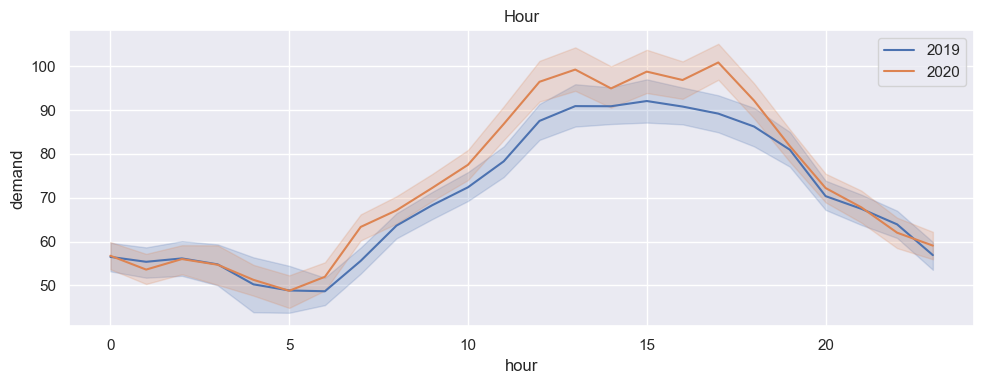

In [24]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='hour', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='hour', y='demand', label='2020')
plt.title("Hour")
plt.tight_layout()
plt.show()

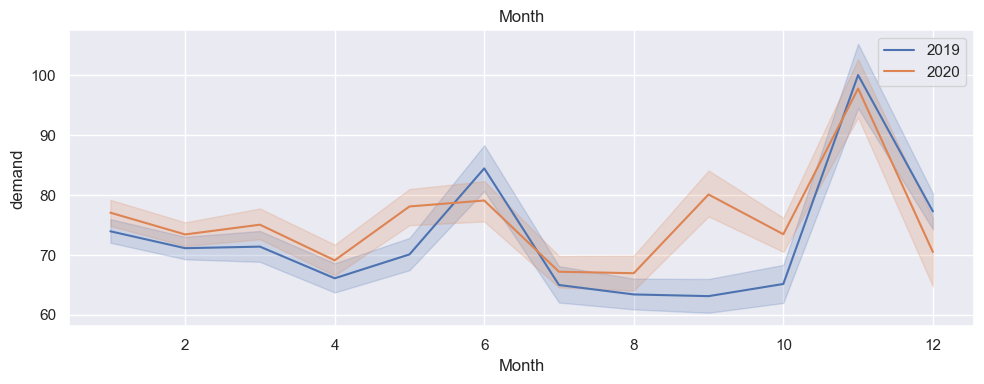

In [26]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Month', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Month', y='demand', label='2020')
plt.title("Month")
plt.tight_layout()
plt.show()

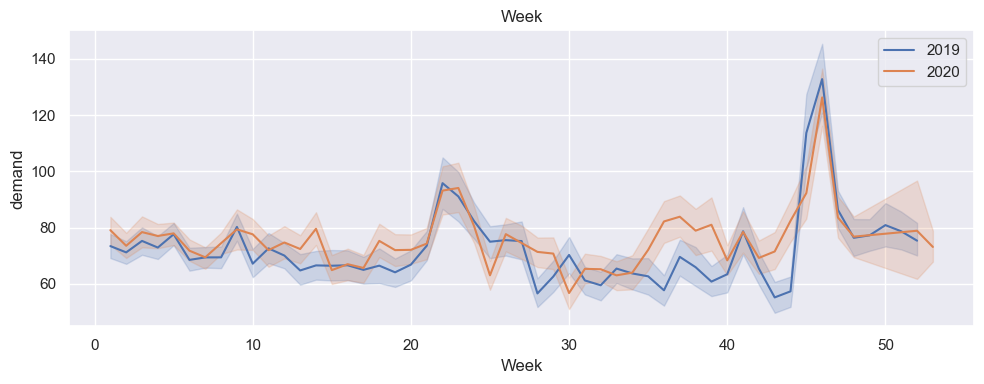

In [27]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Week', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Week', y='demand', label='2020')
plt.title("Week")
plt.tight_layout()
plt.show()

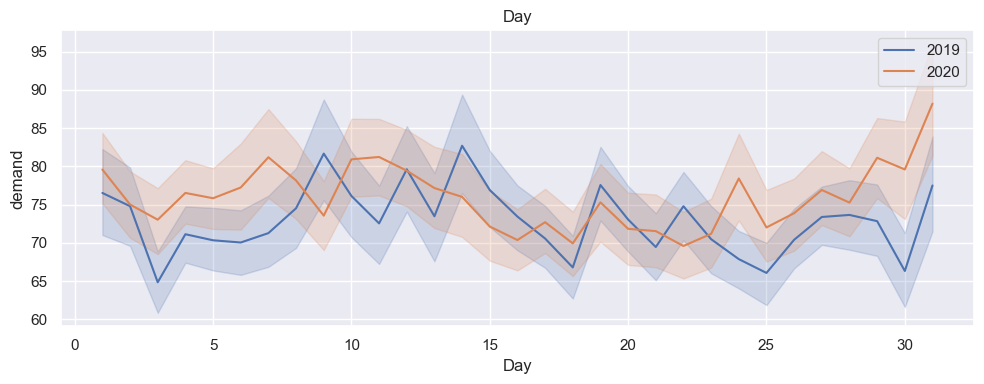

In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Day', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Day', y='demand', label='2020')
plt.title("Day")
plt.tight_layout()
plt.show()

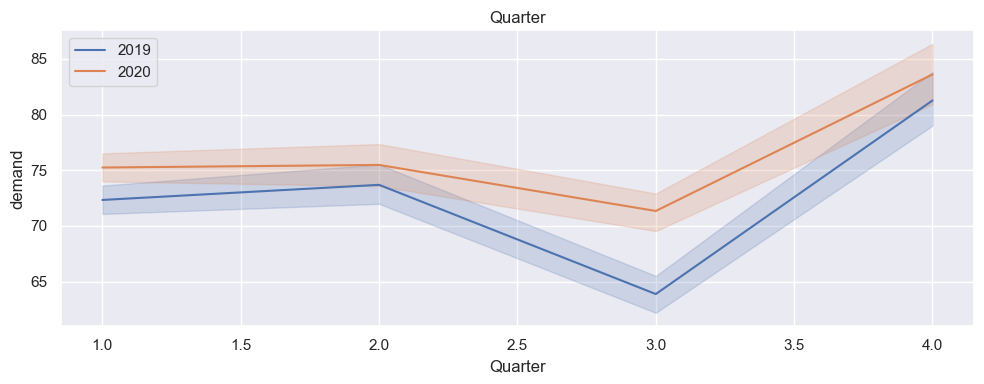

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Quarter', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Quarter', y='demand', label='2020')
plt.title("Quarter")
plt.tight_layout()
plt.show()

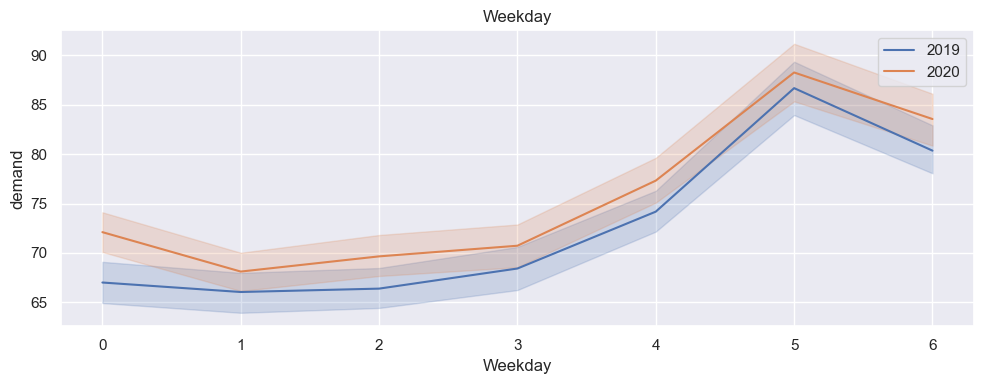

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Weekday', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Weekday', y='demand', label='2020')
plt.title("Weekday")
plt.tight_layout()
plt.show()

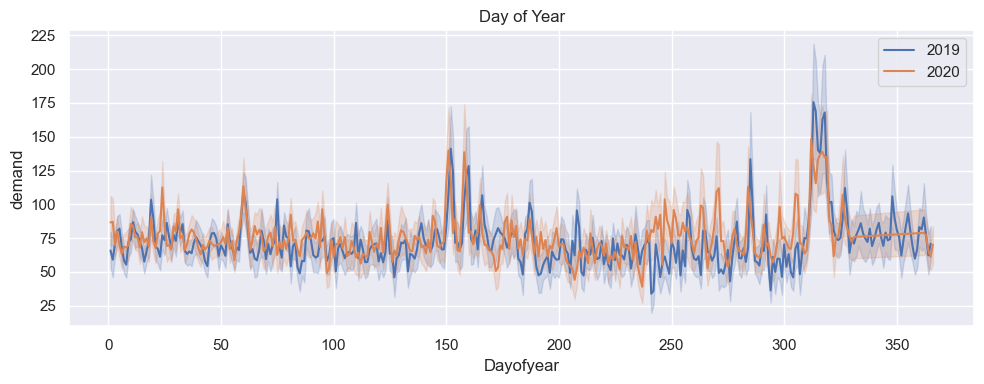

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df_19, x='Dayofyear', y='demand', label='2019')
sns.lineplot(data=train_df_20, x='Dayofyear', y='demand', label='2020')
plt.title("Day of Year")
plt.tight_layout()
plt.show()

In [32]:
X_train = train_df.drop(['date'], axis = 1)
X_test = test_df.drop(['date'], axis = 1)

In [33]:
y_train = train_df['demand']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=45)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(13685, 9) (13685,)
(4562, 9) (4562,)


In [36]:
agg_df = pd.DataFrame(X_train.groupby(['time2']).agg({'demand':'mean'})).reset_index()
agg_df['demand'] = round(agg_df['demand'], 2)
agg_dict = dict(agg_df.values)
print(agg_dict)
X_train['time2'] = X_train['time2'].apply(lambda x:agg_dict[x])
X_val['time2'] = X_val['time2'].apply(lambda x:agg_dict[x])

{'Afteroon': 91.47, 'Dawn': 51.62, 'Early_morning': 58.86, 'Evening': 94.38, 'Late_evening': 79.09, 'Late_night': 56.82, 'Morning': 74.78, 'Night': 63.4}


In [42]:
X_train.head()

,hour,demand,Month,Week,Day,Quarter,Weekday,Dayofyear,time2
8425,16,13,10,43,25,4,4,298,94.38
5619,1,38,5,22,31,2,4,151,56.82
16825,21,35,11,48,26,4,3,331,63.40
17235,10,63,1,2,14,1,3,14,74.78
17018,13,71,1,1,4,1,0,4,91.47


In [37]:
from xgboost import XGBRFRegressor

In [38]:
xgb = XGBRFRegressor()
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [39]:
y_train_pred = xgb.predict(X_train)
y_val_pred = xgb.predict(X_val)
train_error = mean_squared_error(y_train, y_train_pred)
validation_error = mean_squared_error(y_val, y_val_pred)
print("Train RMSE:", round(np.sqrt(train_error), 4))
print("Validation RMSE:", round(np.sqrt(validation_error), 4))

Train RMSE: 1.219
Validation RMSE: 2.0606


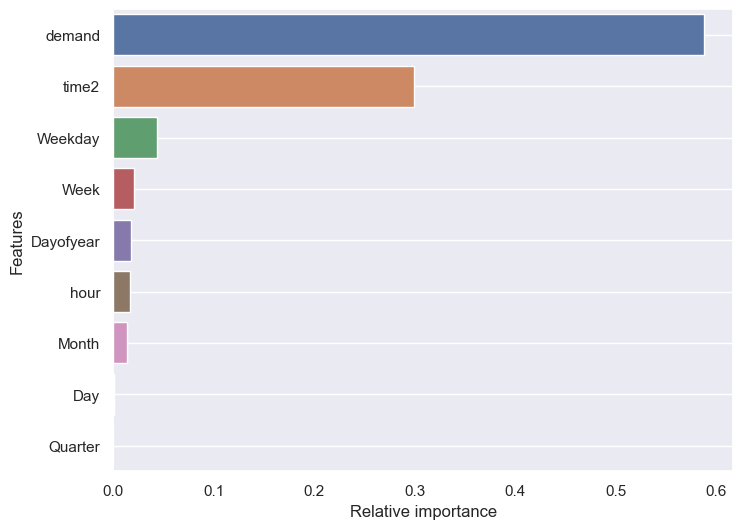

In [40]:
feat_df = pd.DataFrame({'Features': X_train.columns, 'Relative importance': xgb.feature_importances_})
imp_feat_df = feat_df.sort_values('Relative importance', ascending = False)
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Relative importance', y = 'Features', data = imp_feat_df)
plt.grid()
plt.show()

# Reverence
https://www.analyticsvidhya.com/blog/2022/05/machine-learning-approach-to-forecast-cars-demand/